In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wikipedia as wiki
import nltk
import wordcloud

%matplotlib inline

In [30]:
plt.rcParams['figure.figsize']=[12,10]

In [9]:
from nltk.tokenize import word_tokenize

In [2]:
class MyColorFunctor():
    def __init__(self,freq):
        self.freq = freq
    def __call__(self,word,font_size,position,orientation,random_state=None,**kwargs):
        return "hsl(%d, 80%%, 20%%)" %(font_size)# * self.freq[word])

#wordcloud = WordCloud(...,color_func=MyColorFunctor(frequencies))

In [4]:
sov=open('soviet.csv', 'r').read()

In [10]:
sov2=word_tokenize(sov)

In [11]:
stat=nltk.FreqDist(sov2)

In [15]:
stat.keys()

dict_keys(['советский', 'союз,283017', ',', 'ussr', 'герои', 'советского', 'союза,112240', 'hero', 'союз', 'годы,19094', 'years', 'бывший', 'союз,13261', 'previuos', 'фильмы', 'союза,12976', 'films', 'войны', 'союза,12147', 'soldiers', 'имена', 'союза,9880', 'names', 'маршалы', 'союза,9474', 'generals', 'служу', 'советскому', 'союзу,9023', 'on', 'duty', 'служил', 'was', 'республики', 'союза,8558', 'republics', 'of', 'дважды', 'герой', 'союза,8488', 'two', 'times', 'летчики', 'союза,8125', 'pilot', 'великий', 'союз,8070', 'great', 'летчик', 'союза,7979', 'героев', 'союза,7927', 'будучи', '+в', 'советском', 'союзе,7731', 'in', 'великого', 'союза,7055', 'великая', 'отечественная', 'война', 'союза,7003', 'fatherland', 'war', '+мой', 'адрес', 'союз,6948', 'postal', 'adress', 'союза', 'войны,6559', 'ссср,6434', 'фильм', 'союзу,6202', 'film', 'песни', 'союза,5979', 'songs', 'советских', 'социалистических,5929', 'военных,5803', 'звания', 'союза,5774', 'союз,2012', 'союзу', '2012', ',2012', 'ве

In [23]:
danep=pd.DataFrame({'word': list(stat.keys()), 'liczba': list(stat.values())})
danep.set_index('word', inplace=True, drop=False)

In [27]:
dane=danep[danep.word.str.len()>2]

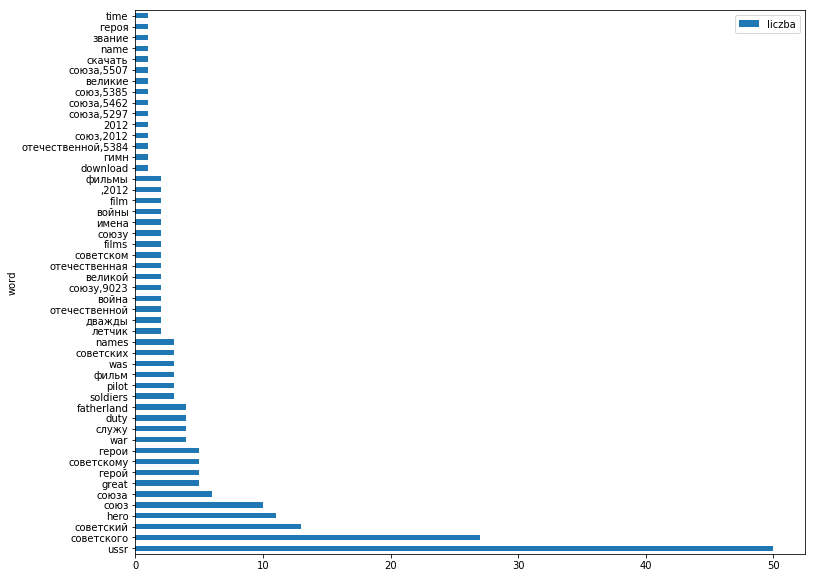

In [31]:
dane.sort_values(by='liczba', ascending=False).head(50).plot(kind='barh')

In [33]:
from nltk import ngrams

In [38]:
a=ngrams(sov2, 2)

In [39]:
for gram in a:
    print(gram)

('советский', 'союз,283017')
('союз,283017', ',')
(',', 'ussr')
('ussr', 'герои')
('герои', 'советского')
('советского', 'союза,112240')
('союза,112240', ',')
(',', 'hero')
('hero', 'ussr')
('ussr', 'советский')
('советский', 'союз')
('союз', 'годы,19094')
('годы,19094', ',')
(',', 'ussr')
('ussr', 'years')
('years', 'бывший')
('бывший', 'советский')
('советский', 'союз,13261')
('союз,13261', ',')
(',', 'previuos')
('previuos', 'ussr')
('ussr', 'фильмы')
('фильмы', 'советского')
('советского', 'союза,12976')
('союза,12976', ',')
(',', 'films')
('films', 'ussr')
('ussr', 'войны')
('войны', 'советского')
('советского', 'союза,12147')
('союза,12147', ',')
(',', 'soldiers')
('soldiers', 'ussr')
('ussr', 'имена')
('имена', 'советского')
('советского', 'союза,9880')
('союза,9880', ',')
(',', 'names')
('names', 'ussr')
('ussr', 'маршалы')
('маршалы', 'советского')
('советского', 'союза,9474')
('союза,9474', ',')
(',', 'generals')
('generals', 'ussr')
('ussr', 'служу')
('служу', 'советскому')


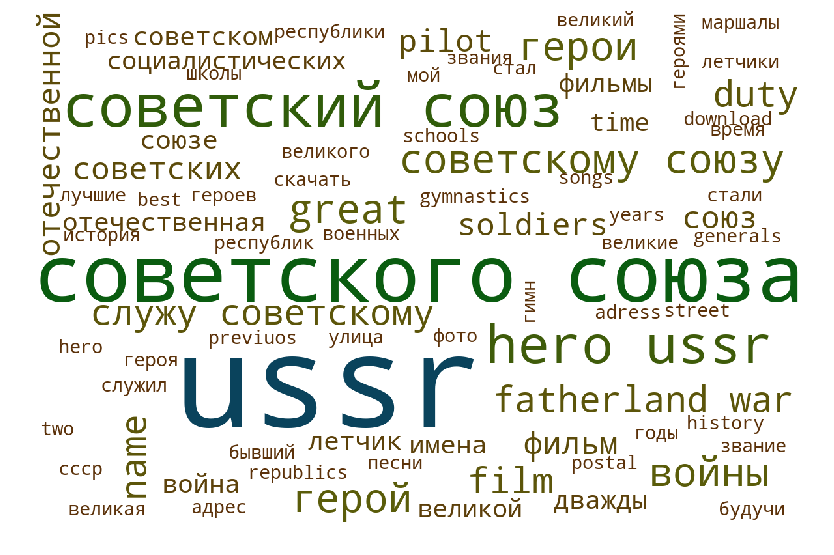

In [7]:

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',
                      relative_scaling=0.5, max_words=120, 
                      collocations=True, width=1200, height=800, min_font_size=6, margin=2, color_func= MyColorFunctor(sov),
                  
                      ranks_only=None).generate(sov)
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.axis('off')
plt.show()